In [ ]:
import networkx as nx

def load_email_conversations(file_path):
    # Create an empty directed graph
    G = nx.DiGraph()

    # Open the file
    with open(file_path, 'r') as file:
        # Read each line
        for line in file:
            # Split the line into sender and receiver
            sender, receiver = line.strip().split(' ')

            # Add edges to the graph
            G.add_edge(sender, receiver)

    return G

# File path to the email conversations text file
file_path = "email_conversations.txt"

# Load the email conversations into a graph
email_graph = load_email_conversations(file_path)

# Print some basic information about the graph
print("Number of nodes:", email_graph.number_of_nodes())
print("Number of edges:", email_graph.number_of_edges())


Number of nodes: 1133
Number of edges: 5451


In [ ]:
import networkx as nx

def load_email_conversations(file_path):
    G = nx.Graph()
    with open(file_path, 'r') as file:
        for line in file:
            sender, receiver = line.strip().split(' ')
            G.add_edge(sender, receiver)
    return G

# Load email conversations into a graph
file_path = "email_conversations.txt"
email_graph = load_email_conversations(file_path)

# Find all cliques of size 8
cliques = [clique for clique in nx.find_cliques(email_graph) if len(clique) == 8]

# Function to check if a clique is maximal
def is_maximal(clique, cliques):
    for existing_clique in cliques:
        if set(clique).issubset(existing_clique) and set(clique) != set(existing_clique):
            return False
    return True

# Filter out non-maximal cliques
maximal_8_cliques = [clique for clique in cliques if is_maximal(clique, cliques)]

# Number of maximal 8-cliques
num_maximal_8_cliques = len(maximal_8_cliques)
print("Number of maximal 8-cliques:", num_maximal_8_cliques)


Number of maximal 8-cliques: 8


In [ ]:
import networkx as nx
import time

def load_email_conversations(file_path):
    G = nx.Graph()
    with open(file_path, 'r') as file:
        for line in file:
            sender, receiver = line.strip().split(' ')
            G.add_edge(sender, receiver)
    return G

# Load email conversations into a graph
file_path = "email_conversations.txt"
email_graph = load_email_conversations(file_path)

# Measure the time it takes to find the largest clique(s)
start_time = time.time()

# Find all cliques
all_cliques = list(nx.find_cliques(email_graph))

# Find the size of the largest clique(s)
max_clique_size = max(len(clique) for clique in all_cliques)

# Filter out the largest clique(s)
largest_cliques = [clique for clique in all_cliques if len(clique) == max_clique_size]

end_time = time.time()
calculation_time = end_time - start_time

print("Largest clique size:", max_clique_size)
print("Number of largest cliques:", len(largest_cliques))
print("Time taken for calculation:", calculation_time, "seconds")


Largest clique size: 12
Number of largest cliques: 1
Time taken for calculation: 0.02955460548400879 seconds


Saving social_circles.txt to social_circles (1).txt
Number of communities after the first iteration: 2
Number of communities after the first iteration: 2


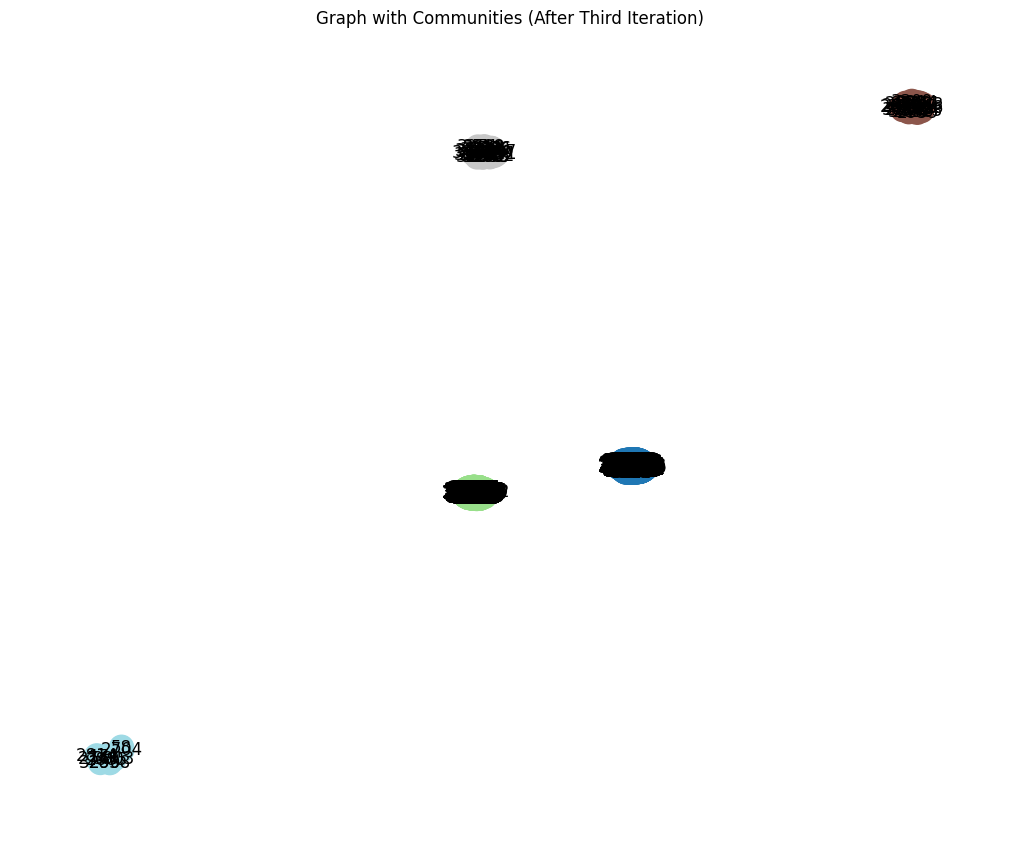

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

import networkx as nx
from networkx.algorithms.community import girvan_newman
from google.colab import files

# Step 1: Upload the "social_circles.txt" file
uploaded = files.upload()

# Step 2: Load the social circles.txt network dataset
file_path = list(uploaded.keys())[0]
G = nx.read_adjlist(file_path)

# Step 3: Find the largest connected component of the graph
largest_cc = max(nx.connected_components(G), key=len)
largest_cc_graph = G.subgraph(largest_cc)

# Step 4: Apply Girvan-Newman method for the first iteration level on the subgraph
communities_iter1 = girvan_newman(largest_cc_graph)

# Step 5: Report the number of resulting communities after the first iteration
num_communities_iter1 = len(tuple(next(communities_iter1)))
print("Number of communities after the first iteration:", num_communities_iter1)

# Assuming you have already obtained the largest connected component subgraph
# largest_cc_graph variable should contain the largest connected component subgraph

# (b) Apply Girvan-Newman method for the first iteration level on the subgraph
communities_iter1 = nx.algorithms.community.girvan_newman(largest_cc_graph)

# Report the number of resulting communities after the first iteration
num_communities_iter1 = len(tuple(next(communities_iter1)))
print("Number of communities after the first iteration:", num_communities_iter1)

# (c) Compute the communities after the third iteration
communities_iter3 = None
for _ in range(3):
    communities_iter3 = next(communities_iter1)

# Create a new graph
G = nx.Graph()

# Add edges from the communities after the third iteration
for community in communities_iter3:
    G.add_edges_from(nx.complete_graph(community).edges())

# Create a community color mapping
community_colors = {}
for i, community in enumerate(communities_iter3):
    for node in community:
        community_colors[node] = i

# Generate positions for nodes
pos = nx.spring_layout(G)

# Draw the graph with nodes colored according to their community
plt.figure(figsize=(10, 8))
nx.draw(G, pos, node_color=[community_colors[node] for node in G.nodes()], cmap=plt.cm.tab20, with_labels=True)
plt.title("Graph with Communities (After Third Iteration)")
plt.show()


In [ ]:
import networkx as nx

# Load the network dataset from the file
file_path = "social_circles.txt"
G = nx.read_edgelist(file_path)

# Find the largest connected component
largest_component = max(nx.connected_components(G), key=len)
largest_component_graph = G.subgraph(largest_component)

# Print the number of nodes and edges in the largest connected component
print("Number of nodes in the largest connected component:", largest_component_graph.number_of_nodes())
print("Number of edges in the largest connected component:", largest_component_graph.number_of_edges())


Number of nodes in the largest connected component: 775
Number of edges in the largest connected component: 14006


In [ ]:
import networkx as nx

# Load the network dataset from the file
file_path = "social_circles.txt"
G = nx.read_edgelist(file_path)

# Find the largest connected component
largest_component = max(nx.connected_components(G), key=len)
largest_component_graph = G.subgraph(largest_component)

# Apply Girvan-Newman method for the first iteration level
communities_generator = nx.algorithms.community.girvan_newman(largest_component_graph)
first_iteration_communities = next(communities_generator)

# Report the number of resulting communities
num_communities = len(first_iteration_communities)
print("Number of communities in the first iteration:", num_communities)


Number of communities in the first iteration: 2


In [ ]:
import networkx as nx

# Load the network dataset from the file
file_path = "social_circles.txt"
G = nx.read_edgelist(file_path)

# Find the largest connected component
largest_component = max(nx.connected_components(G), key=len)
largest_component_graph = G.subgraph(largest_component)

# Apply Girvan-Newman method for the second iteration level
communities_generator = nx.algorithms.community.girvan_newman(largest_component_graph)
for i in range(2):  # Perform two iterations
    next(communities_generator)

second_iteration_communities = next(communities_generator)

# Compute the size of each community after the second iteration
community_sizes = [len(community) for community in second_iteration_communities]

# Print the size of each community
print("Size of each community after the second iteration:")
for idx, size in enumerate(community_sizes, start=1):
    print(f"Community {idx}: {size} nodes")


Size of each community after the second iteration:
Community 1: 507 nodes
Community 2: 226 nodes
Community 3: 19 nodes
Community 4: 23 nodes


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the network dataset from the file
file_path = "social_circles.txt"
G = nx.read_edgelist(file_path)

# Find the largest connected component
largest_component = max(nx.connected_components(G), key=len)
largest_component_graph = G.subgraph(largest_component)

# Apply Girvan-Newman method for the third iteration level
communities_generator = nx.algorithms.community.girvan_newman(largest_component_graph)
for i in range(3):  # Perform three iterations
    next(communities_generator)

third_iteration_communities = next(communities_generator)

# Create a color map for the communities
color_map = {}
for idx, community in enumerate(third_iteration_communities):
    for node in community:
        color_map[node] = idx

# Draw the graph with nodes colored according to their community
pos = nx.spring_layout(largest_component_graph)  # Layout algorithm
nx.draw(largest_component_graph, pos, node_color=[color_map[node] for node in largest_component_graph.nodes()], with_labels=True, cmap=plt.cm.Set1)
plt.show()
